In [1]:
!pip install spotipy 


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline as pyo

## Paso 1: Acceder a la API de Spotify

Lo primero que se debe realizar es obtener las credenciales para acceder a la API de [Spotify](https://open.spotify.com/) que nos permitirá extraer data de la plataforma. Para ello es necesario crearse una cuenta en [Spotify for Developers](https://developer.spotify.com/dashboard/) y darle al botón verde "Create an app". Luego se le da click a la app creada y se usarán las credenciales como en la foto:


In [3]:
client_id = "aaf737ed7fec472486036ffaabe692ea" # Cambiar por tu Client ID
client_secret = "d181ecee4321489ca6d008037924b869" # Cambiar por tu Client Secret

# Authentication - sin user
client_credentials_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

## Paso 2: Obtener canciones (tracks) y artistas

#### Paso 2.1: Obtener información de las canciones (tracks)

In [4]:
nombre_artista = []
id_artista = []
nombre_cancion = []
id_cancion = []
popularidad_cancion = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2023', type='track', limit=50,offset=i)
    for i, c in enumerate(track_results['tracks']['items']):
        nombre_artista.append(c['artists'][0]['name'])
        id_artista.append(c['artists'][0]['id'])
        nombre_cancion.append(c['name'])
        id_cancion.append(c['id'])
        popularidad_cancion.append(c['popularity'])

In [5]:
track_df = pd.DataFrame({'nombre_artista':nombre_artista, 'nombre_cancion':nombre_cancion, 'id_cancion':id_cancion, 'popularidad_cancion':popularidad_cancion, 'id_artista':id_artista})
print(track_df.shape)
track_df.head()

(1000, 5)


,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista
0,Mitski,My Love Mine All Mine,3vkCueOmm7xQDoJ17W1Pm3,98,2uYWxilOVlUdk4oV9DvwqK
1,Zach Bryan,I Remember Everything (feat. Kacey Musgraves),4KULAymBBJcPRpk1yO4dOG,93,40ZNYROS4zLfyyBSs2PGe2
2,Jack Harlow,Lovin On Me,4xhsWYTOGcal8zt0J161CU,95,2LIk90788K0zvyj2JJVwkJ
3,Tate McRae,greedy,3rUGC1vUpkDG9CZFHMur1t,100,45dkTj5sMRSjrmBSBeiHym
4,Drake,IDGAF (feat. Yeat),2YSzYUF3jWqb9YP9VXmpjE,93,3TVXtAsR1Inumwj472S9r4


#### Paso 2.2: Agregar información sobre los artistas que interpretan las canciones (tracks)

In [6]:
popularidad_artista = []
generos_artista = []
seguidores_artista = []
for id_a in track_df.id_artista:
  artista = sp.artist(id_a)
  popularidad_artista.append(artista['popularity'])
  generos_artista.append(artista['genres'])
  seguidores_artista.append(artista['followers']['total'])

In [7]:
track_df = track_df.assign(popularidad_artista=popularidad_artista, generos_artista=generos_artista, seguidores_artista=seguidores_artista)
track_df.head()

,nombre_artista,nombre_cancion,id_cancion,popularidad_cancion,id_artista,popularidad_artista,generos_artista,seguidores_artista
0,Mitski,My Love Mine All Mine,3vkCueOmm7xQDoJ17W1Pm3,98,2uYWxilOVlUdk4oV9DvwqK,82,"[brooklyn indie, pov: indie]",6056380
1,Zach Bryan,I Remember Everything (feat. Kacey Musgraves),4KULAymBBJcPRpk1yO4dOG,93,40ZNYROS4zLfyyBSs2PGe2,86,"[classic oklahoma country, modern country pop]",2712904
2,Jack Harlow,Lovin On Me,4xhsWYTOGcal8zt0J161CU,95,2LIk90788K0zvyj2JJVwkJ,83,"[deep underground hip hop, kentucky hip hop, p...",3202916
3,Tate McRae,greedy,3rUGC1vUpkDG9CZFHMur1t,100,45dkTj5sMRSjrmBSBeiHym,83,"[alt z, pop]",4217925
4,Drake,IDGAF (feat. Yeat),2YSzYUF3jWqb9YP9VXmpjE,93,3TVXtAsR1Inumwj472S9r4,95,"[canadian hip hop, canadian pop, hip hop, pop ...",82997736


## Paso 3: Obtener variables numéricas de las canciones (tracks)

In [9]:
variables_cancion = []
for id_c in track_df['id_cancion']:
  af = sp.audio_features(id_c)
  variables_cancion.append(af)

Max Retries reached


SpotifyException: http status: 429, code:-1 - /v1/audio-features/?ids=3vkCueOmm7xQDoJ17W1Pm3:
 Max Retries, reason: too many 429 error responses

In [ ]:
print(variables_cancion[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [ ]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [ ]:
for variables in variables_cancion:
  for var in variables:
    # Utilizando el constructor de DataFrame
    tf_df = pd.concat([tf_df, pd.DataFrame([var])], ignore_index=True)


In [ ]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.504,0.308,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,audio_features,3vkCueOmm7xQDoJ17W1Pm3,spotify:track:3vkCueOmm7xQDoJ17W1Pm3,https://api.spotify.com/v1/tracks/3vkCueOmm7xQ...,https://api.spotify.com/v1/audio-analysis/3vkC...,137773,4
1,0.429,0.453,0,-7.746,1,0.0459,0.5540,0.000002,0.1020,0.155,77.639,audio_features,4KULAymBBJcPRpk1yO4dOG,spotify:track:4KULAymBBJcPRpk1yO4dOG,https://api.spotify.com/v1/tracks/4KULAymBBJcP...,https://api.spotify.com/v1/audio-analysis/4KUL...,227196,4
2,0.943,0.558,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,audio_features,4xhsWYTOGcal8zt0J161CU,spotify:track:4xhsWYTOGcal8zt0J161CU,https://api.spotify.com/v1/tracks/4xhsWYTOGcal...,https://api.spotify.com/v1/audio-analysis/4xhs...,138411,4
3,0.750,0.733,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,audio_features,3rUGC1vUpkDG9CZFHMur1t,spotify:track:3rUGC1vUpkDG9CZFHMur1t,https://api.spotify.com/v1/tracks/3rUGC1vUpkDG...,https://api.spotify.com/v1/audio-analysis/3rUG...,131872,1
4,0.663,0.670,8,-8.399,1,0.2710,0.0464,0.000089,0.2050,0.138,136.952,audio_features,2YSzYUF3jWqb9YP9VXmpjE,spotify:track:2YSzYUF3jWqb9YP9VXmpjE,https://api.spotify.com/v1/tracks/2YSzYUF3jWqb...,https://api.spotify.com/v1/audio-analysis/2YSz...,260111,4


In [ ]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
tf_df = tf_df.drop(columns=['key','mode','type', 'uri','track_href','analysis_url'])
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   object
 1   nombre_cancion       1000 non-null   object
 2   id_cancion           1000 non-null   object
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   object
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   spe

In [ ]:
track_df['nombre_artista'] = track_df['nombre_artista'].astype("string")
track_df['nombre_cancion'] = track_df['nombre_cancion'].astype("string")
track_df['id_cancion'] = track_df['id_cancion'].astype("string")
track_df['id_artista'] = track_df['id_artista'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   nombre_artista       1000 non-null   string
 1   nombre_cancion       1000 non-null   string
 2   id_cancion           1000 non-null   string
 3   popularidad_cancion  1000 non-null   int64 
 4   id_artista           1000 non-null   string
 5   popularidad_artista  1000 non-null   int64 
 6   generos_artista      1000 non-null   object
 7   seguidores_artista   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   f

## Paso 4: Obtener las canciones, artistas y géneros más populares

#### Paso 4.1: Obtener canciones más populares

In [ ]:
top_canciones = track_df.sort_values(by=['popularidad_cancion'], ascending=False)[['nombre_cancion', 'nombre_artista', 'popularidad_cancion']].head(20)
top_canciones.index = np.arange(1, len(top_canciones)+1)
top_canciones

,nombre_cancion,nombre_artista,popularidad_cancion
1,greedy,Tate McRae,100
2,My Love Mine All Mine,Mitski,98
3,Standing Next to You,Jung Kook,98
4,PERRO NEGRO,Bad Bunny,97
5,Strangers,Kenya Grace,97
6,MONACO,Bad Bunny,97
7,Paint The Town Red,Doja Cat,95
8,LALA,Myke Towers,95
9,HARLEY QUINN,Fuerza Regida,95
10,Water,Tyla,95


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

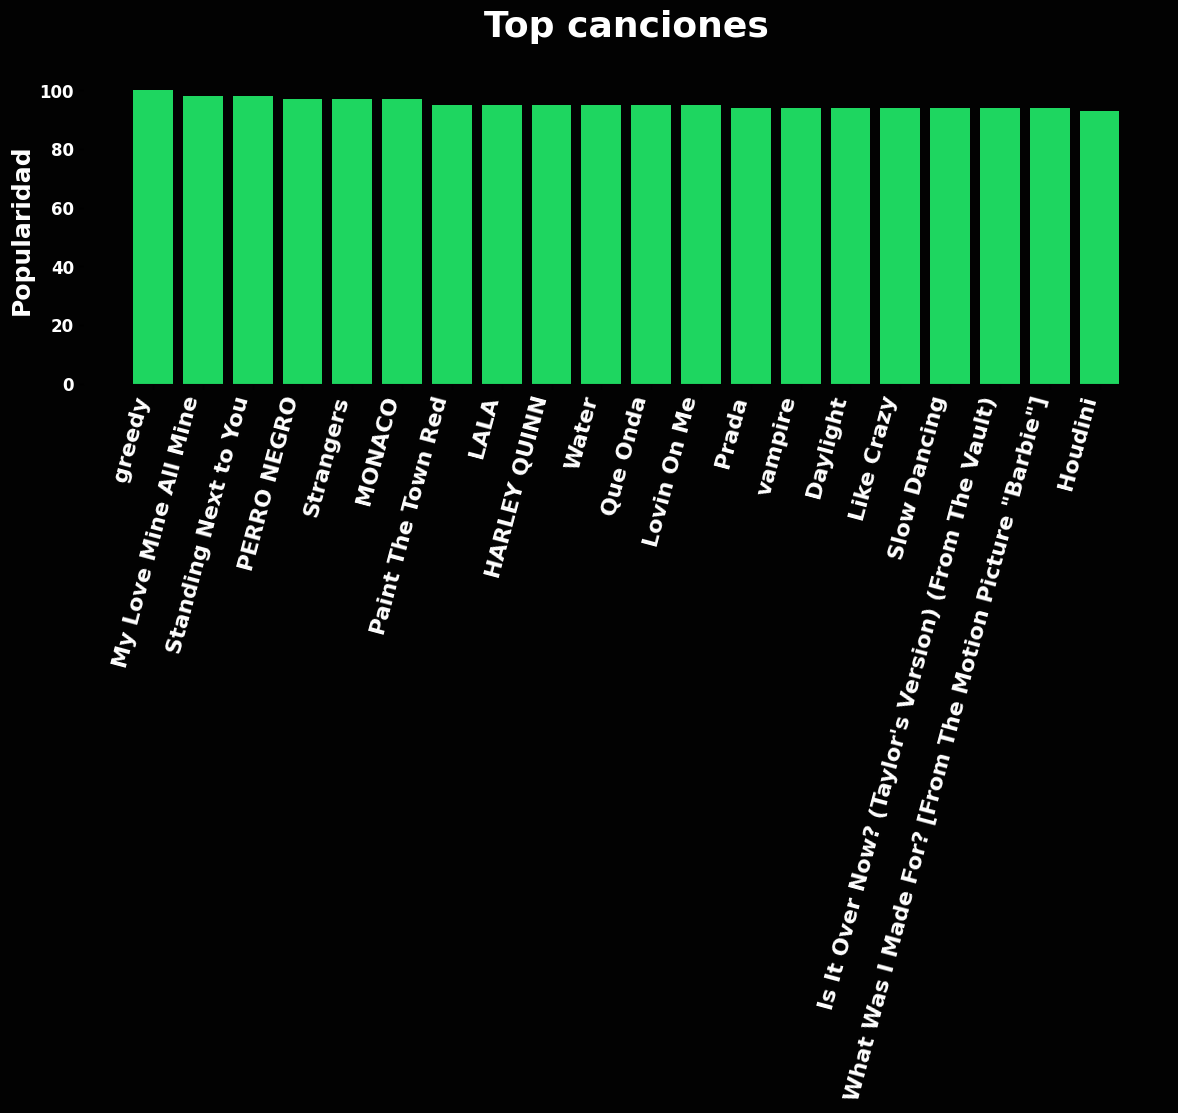

In [ ]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones['nombre_cancion'], top_canciones['popularidad_cancion'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top canciones", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.2: Obtener artistas más populares según número de seguidores

In [ ]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['seguidores_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['seguidores_artista'] = top_artistas['seguidores_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Ed Sheeran,115871885,86,"['pop', 'singer-songwriter pop', 'uk pop']"
2,Taylor Swift,95122060,100,['pop']
3,Billie Eilish,89683599,86,"['art pop', 'pop']"
4,Drake,82997736,95,"['canadian hip hop', 'canadian pop', 'hip hop'..."
5,Bad Bunny,77639781,95,"['reggaeton', 'trap latino', 'urbano latino']"
6,The Weeknd,75576743,93,"['canadian contemporary r&b', 'canadian pop', ..."
7,BTS,71532453,85,"['k-pop', 'k-pop boy group', 'pop']"
8,Selena Gomez,47029721,81,"['pop', 'post-teen pop']"
9,Post Malone,43034258,86,"['dfw rap', 'melodic rap', 'pop', 'rap']"
10,Dua Lipa,42453635,85,"['dance pop', 'pop', 'uk pop']"


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

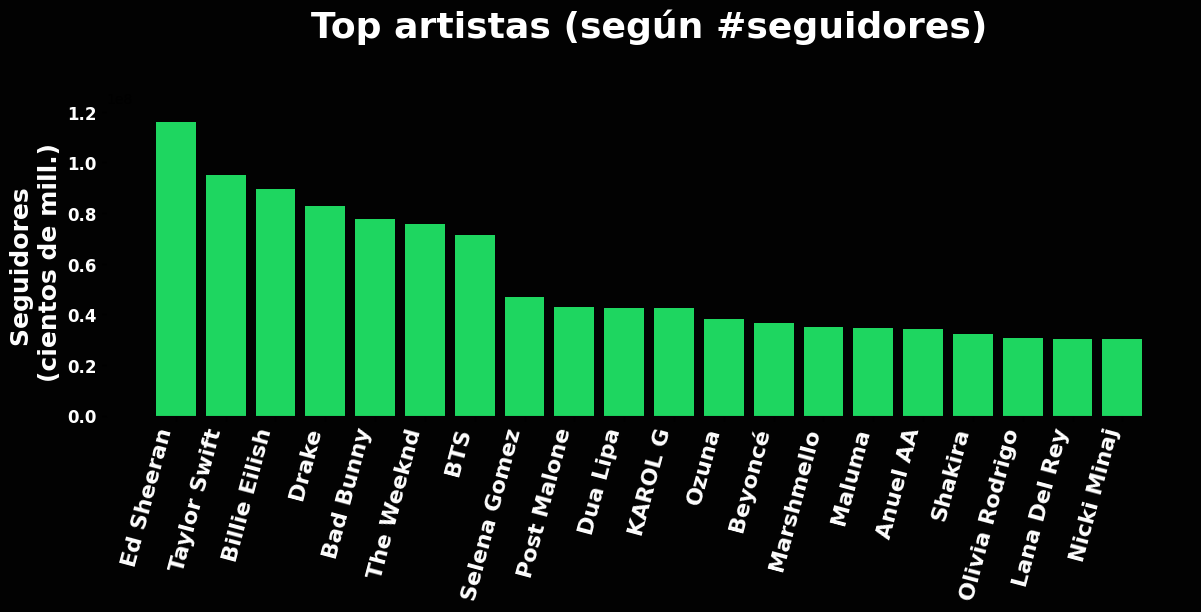

In [ ]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['seguidores_artista'], color='#1ED660')
ax.set_ylabel("Seguidores \n(cientos de mill.)", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según #seguidores)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=12, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.3: Obtener artistas más populares según popularidad

In [ ]:
top_artistas = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'], ascending=False)[['nombre_artista','seguidores_artista','popularidad_artista','generos_artista']])
top_artistas = top_artistas.astype(str).drop_duplicates().head(20)
top_artistas['popularidad_artista'] = top_artistas['popularidad_artista'].astype('int')
top_artistas.index = np.arange(1, len(top_artistas)+1)
top_artistas

,nombre_artista,seguidores_artista,popularidad_artista,generos_artista
1,Taylor Swift,95122060,100,['pop']
2,Bad Bunny,77639781,95,"['reggaeton', 'trap latino', 'urbano latino']"
3,Drake,82997736,95,"['canadian hip hop', 'canadian pop', 'hip hop'..."
4,The Weeknd,75576743,93,"['canadian contemporary r&b', 'canadian pop', ..."
5,Travis Scott,25533848,90,"['hip hop', 'rap', 'slap house']"
6,Peso Pluma,9585526,90,"['corridos tumbados', 'sad sierreno']"
7,Feid,8608725,89,"['colombian pop', 'pop reggaeton', 'reggaeton'..."
8,Jung Kook,11646484,89,['k-pop']
9,KAROL G,42344386,88,"['reggaeton', 'reggaeton colombiano', 'trap la..."
10,Lana Del Rey,30394218,88,"['art pop', 'pop']"


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

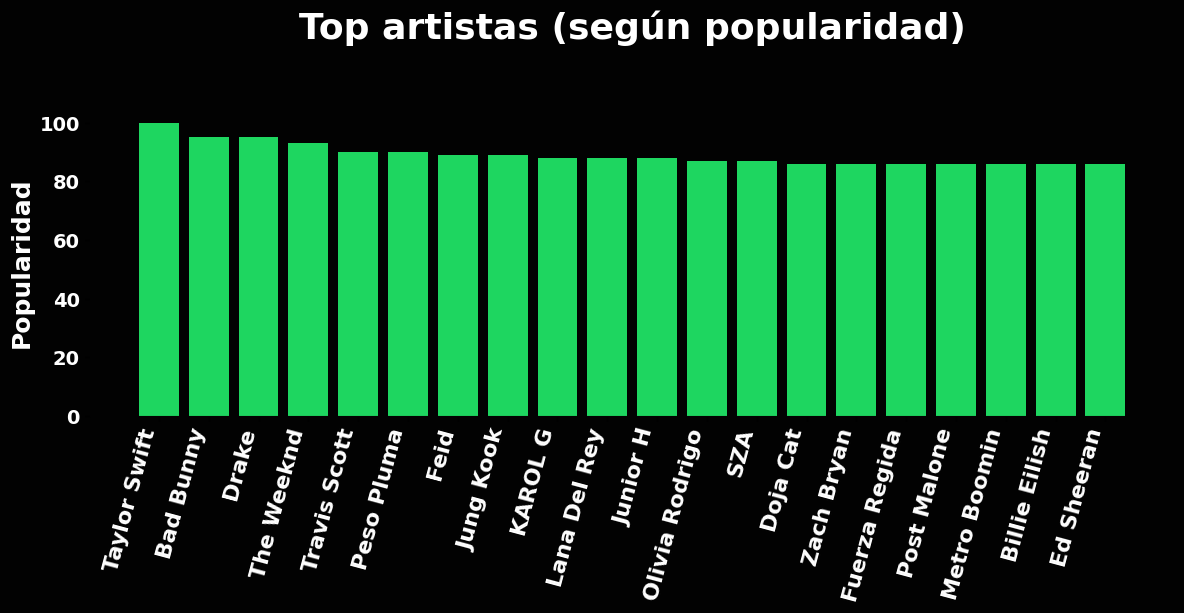

In [ ]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas['nombre_artista'], top_artistas['popularidad_artista'], color='#1ED660')
ax.set_ylabel("Popularidad", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas (según popularidad)", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

#### Paso 4.4: Obtener los géneros más populares

In [ ]:
top_generos = pd.Series([x for _list in track_df['generos_artista'] for x in _list]).value_counts().head(20).to_frame().reset_index()
top_generos = top_generos.rename(columns = {'index':'generos', 0:'frecuencia'})
top_generos.index = np.arange(1, len(top_generos)+1)
top_generos

,generos,count
1,pop,173
2,rap,151
3,urbano latino,89
4,hip hop,87
5,trap latino,87
6,reggaeton,76
7,sad sierreno,71
8,modern country pop,70
9,contemporary country,65
10,pop rap,63


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

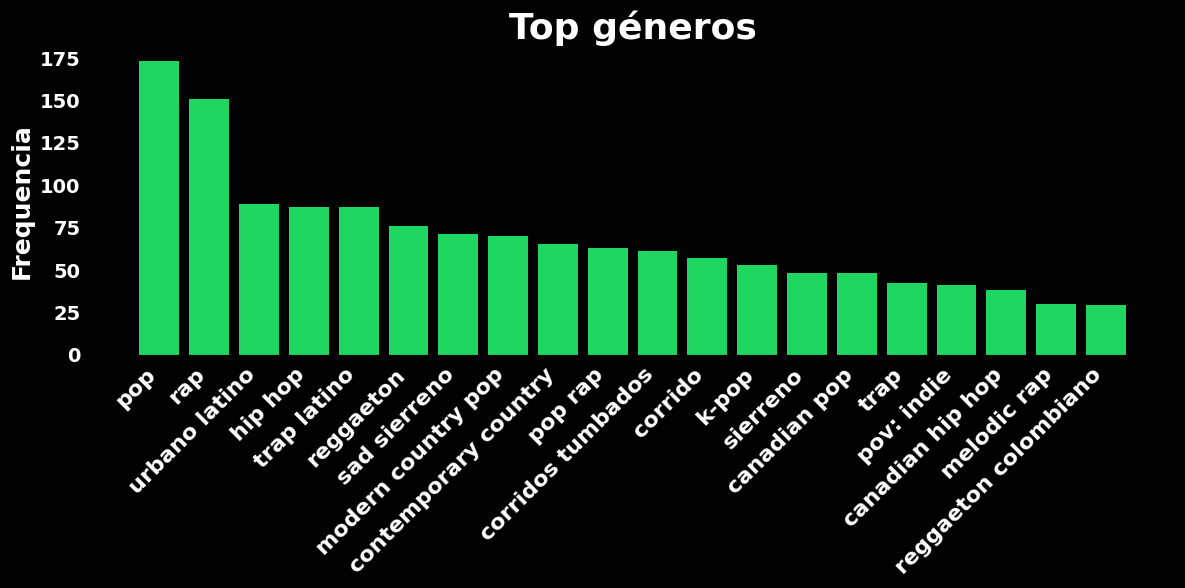

In [ ]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_generos['generos'], top_generos['count'], color='#1ED660')
ax.set_ylabel("Frequencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')
plt.show()

## Paso 5: Obtener artistas y canciones más populares (por seguidores) por género más popular

#### Paso 5.1: Obtener artistas más populares (por seguidores) por género más popular

In [ ]:
by_artista_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_artista'],ascending=False)[['popularidad_artista','nombre_artista','generos_artista','id_artista']])
by_artista_pop.astype(str).drop_duplicates().head(20)
by_artista_pop
top_artistas_por_genero = []
for genero in top_generos['generos'].to_list():
  for index, row in by_artista_pop.iterrows():
    if genero in row['generos_artista']:
      top_artistas_por_genero.append({'nombre_artista':row['nombre_artista'], 'popularidad_artista':row['popularidad_artista'],'generos':genero})
      break
top_artistas_por_genero = pd.json_normalize(top_artistas_por_genero)
top_artistas_por_genero = top_artistas_por_genero.merge(top_generos, on='generos', how='left')
top_artistas_por_genero

,nombre_artista,popularidad_artista,generos,count
0,Taylor Swift,100,pop,173
1,Drake,95,rap,151
2,Bad Bunny,95,urbano latino,89
3,Drake,95,hip hop,87
4,Bad Bunny,95,trap latino,87
5,Bad Bunny,95,reggaeton,76
6,Peso Pluma,90,sad sierreno,71
7,Zach Bryan,86,modern country pop,70
8,Morgan Wallen,85,contemporary country,65
9,Drake,95,pop rap,63


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

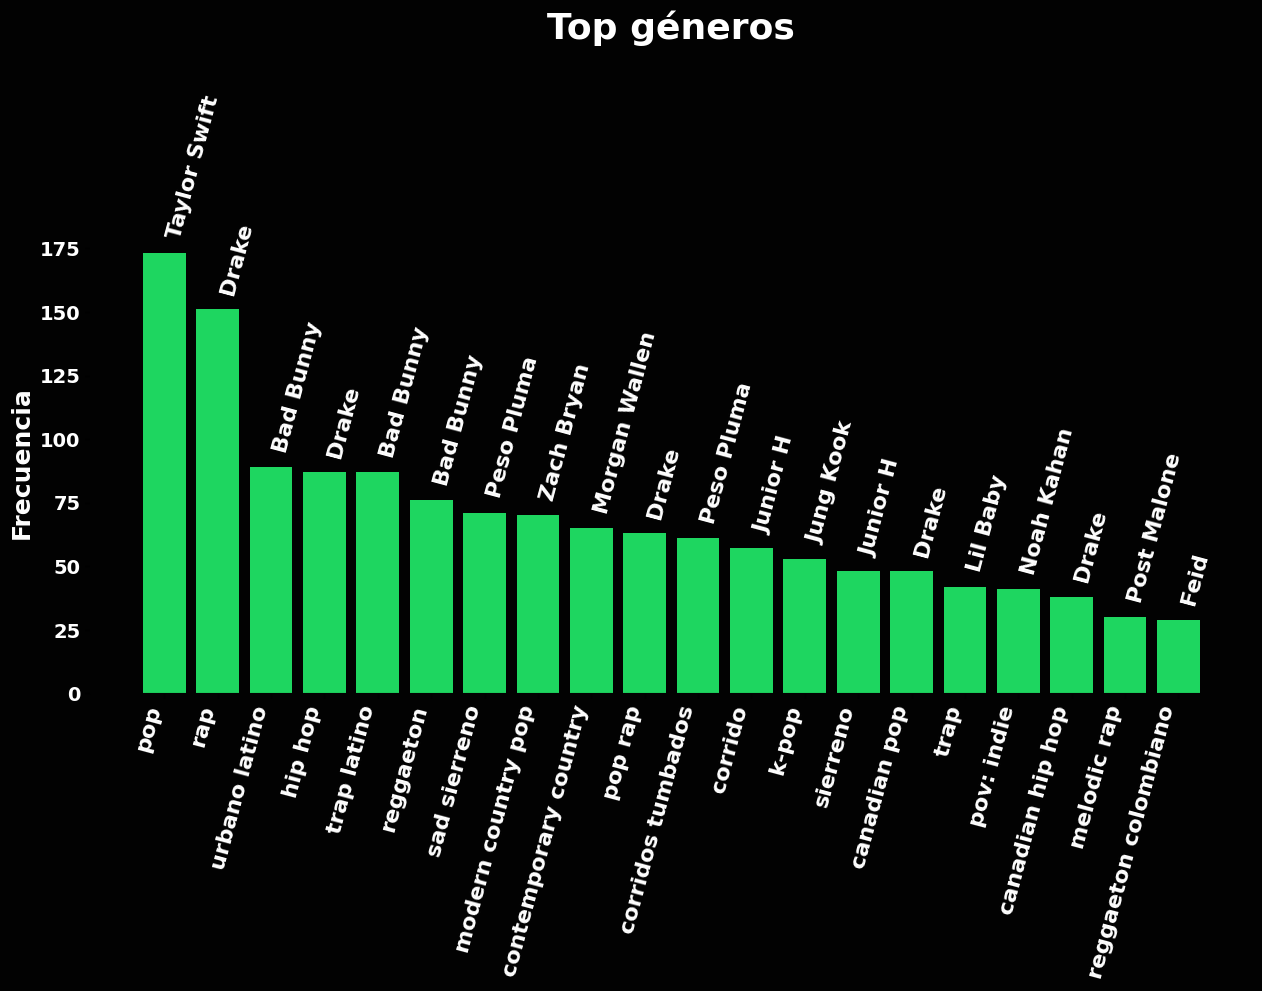

In [ ]:
plt.figure(figsize=(15,6), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_artistas_por_genero['generos'], top_artistas_por_genero['count'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top géneros", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=1.4)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=75, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_artistas_por_genero['nombre_artista'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Open Sans', color='white', size=16, rotation=75, weight='bold')
plt.show()

#### Paso 5.2: Obtener canciones más populares (por seguidores) por género más popular

In [ ]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['popularidad_cancion'],ascending=False)[['popularidad_cancion','nombre_cancion','nombre_artista','generos_artista','id_cancion']])
top_canciones_por_genero = []
for genre in top_generos['generos'].to_list():
  for index, row in by_track_pop.iterrows():
    if genre in row['generos_artista']:
      top_canciones_por_genero.append({'nombre_cancion':row['nombre_cancion'], 'popularidad_cancion':row['popularidad_cancion'], 'generos':genre})
      break
top_canciones_por_genero = pd.json_normalize(top_canciones_por_genero)
top_canciones_por_genero = top_canciones_por_genero.merge(top_generos, on='generos', how='left')
top_canciones_por_genero

,nombre_cancion,popularidad_cancion,generos,count
0,greedy,100,pop,173
1,Lovin On Me,95,rap,151
2,PERRO NEGRO,97,urbano latino,89
3,IDGAF (feat. Yeat),93,hip hop,87
4,PERRO NEGRO,97,trap latino,87
5,PERRO NEGRO,97,reggaeton,76
6,HARLEY QUINN,95,sad sierreno,71
7,I Remember Everything (feat. Kacey Musgraves),93,modern country pop,70
8,Fast Car,88,contemporary country,65
9,Lovin On Me,95,pop rap,63


findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: Font family 'Open Sans' not found.
findfont: 

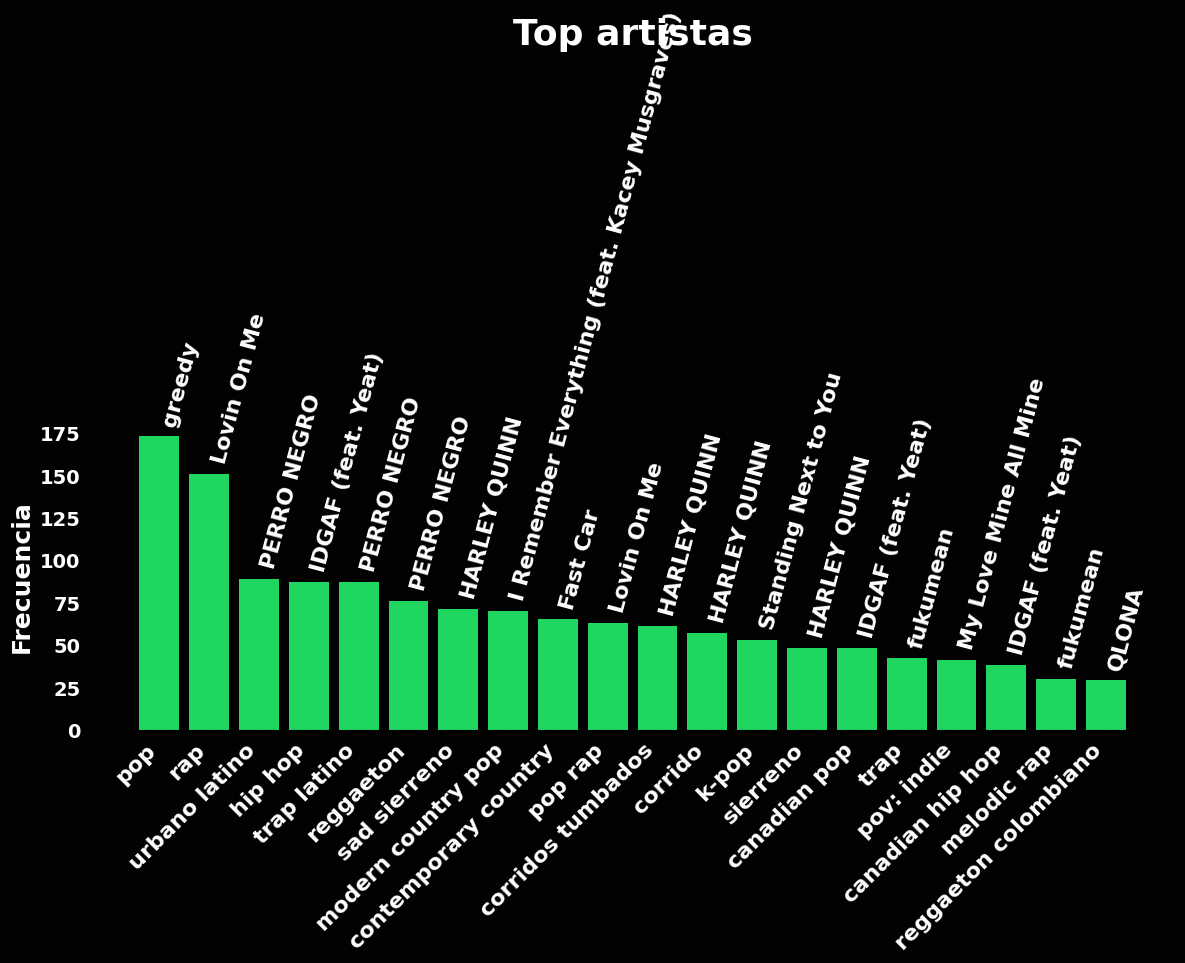

In [ ]:
plt.figure(figsize=(14,4), facecolor='#020202') 
ax = plt.axes() 
ax.bar(top_canciones_por_genero['generos'], top_canciones_por_genero['count'], color='#1ED660')
ax.set_ylabel("Frecuencia", {'fontname':'Open Sans'}, size = 18, color='white', weight='bold')
ax.set_title("Top artistas", {'fontname':'Open Sans'}, size = 26, color='white', weight='bold', x=0.5, y=2.2)
ax.set_facecolor("#020202")
ax.grid(False)
plt.setp(ax.get_xticklabels(), fontname='Open Sans', rotation=45, ha="right", color='white', size=16, weight='bold')
plt.setp(ax.get_yticklabels(), fontname='Open Sans', color='white', size=14, weight='bold')
plt.setp(ax.spines.values(), color='#020202')

for rect, label in zip(ax.patches, top_canciones_por_genero['nombre_cancion'].to_list()):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha="left", va="bottom", fontname='Open Sans', color='white', size=16, rotation=75, weight='bold')

plt.show()

## Paso 6: Análisis de las variables de las canciones

findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: Font family 'open sans' not found.
findfont: 

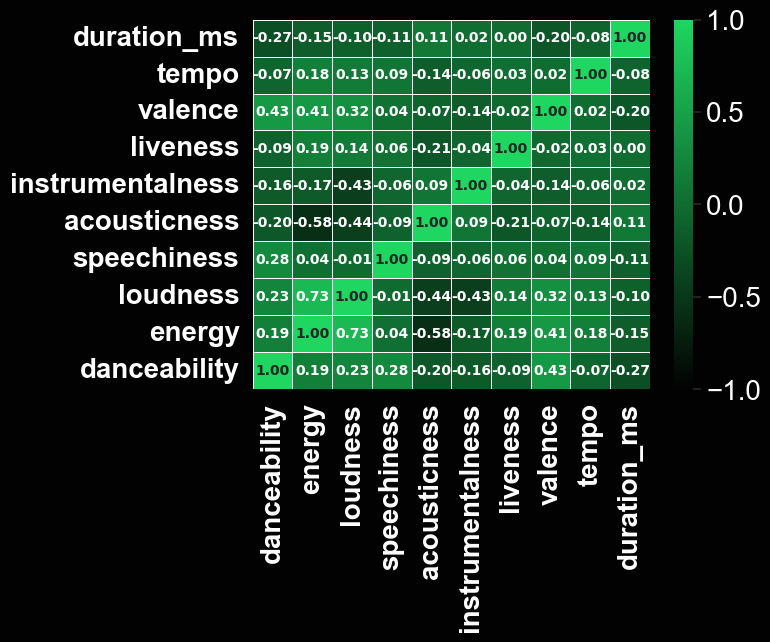

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
# Selecciona solo las columnas numéricas
numeric_cols = tf_df.select_dtypes(include=['float64', 'int64'])

# Calcula la correlación
correlation_matrix = numeric_cols.corr()

# Visualiza la matriz de correlación
cmap = LinearSegmentedColormap.from_list('Spotify', ['#020202', '#1ED660'])
ax = sns.heatmap(correlation_matrix, cmap=cmap, vmin=-1, vmax=1, annot=True, fmt="0.2f", linewidths=.5, annot_kws={'fontsize': 10, 'fontweight': 'bold', 'fontfamily': 'open sans'})
sns.set(rc={'axes.facecolor': '#020202', 'figure.facecolor': '#020202'}, font_scale=1.8)



ax.set_ylim([0,10])
ax.set(facecolor='black')
ax.figure.axes[1].tick_params(axis="y", labelsize=20, labelcolor='white')

for label1, label2 in zip(ax.get_xticklabels(), ax.get_yticklabels()):
    label1.set_size(20)
    label1.set_weight("bold")
    label1.set_color("white")
    label2.set_size(20)
    label2.set_weight("bold")
    label2.set_color("white")
plt.show()

## Paso 7: Radar chart usando las variables de las canciones

In [ ]:
# Crear un dataframe con las variables de las top 100 canciones
var_canc_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_var = pd.DataFrame(columns=var_canc_cols)
for i, track in by_track_pop[:100].iterrows():
  variables = tf_df[tf_df['id'] == track['id_cancion']]
  top_100_var = pd.concat([top_100_var, variables], ignore_index=True)
  # top_100_var = top_100_var.append(variables, ignore_index=True)
top_100_var = top_100_var[var_canc_cols]

mean_vals = pd.DataFrame(columns=var_canc_cols)
# En lugar de append, utiliza concat para mean_vals
mean_vals = pd.concat([mean_vals, top_100_var.mean().to_frame().T], ignore_index=True)
mean_vals = pd.concat([mean_vals, tf_df[var_canc_cols].mean().to_frame().T], ignore_index=True)
# mean_vals = mean_vals.append(top_100_var.mean(), ignore_index=True)
# mean_vals = mean_vals.append(tf_df[var_canc_cols].mean(), ignore_index=True)
mean_vals

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.706430,0.677831,0.094626,0.245320,0.023986,0.170961,0.529872
1,0.647527,0.640327,0.097373,0.248539,0.026451,0.176107,0.481228


In [ ]:
fig = go.Figure(data=[go.Scatterpolar(r=mean_vals.iloc[0], theta=var_canc_cols, fill='toself', name='Top 100', line_color='#FFFFFF', fillcolor='rgba(255,255,255,0.9)'),
                      go.Scatterpolar(r=mean_vals.iloc[1], theta=var_canc_cols, fill='toself', name='Todas', line_color='rgb(30,214,96)', fillcolor='rgba(30,214,96,0.7)')],
                layout=go.Layout(title=go.layout.Title(text='Comparación de características'),
                                 polar={'radialaxis': {'visible': True}},
                                 showlegend=True, plot_bgcolor='#020202', paper_bgcolor='#020202'))
fig.update_layout(title=dict(text='Comparación de características',
                             font=dict(family="sans-serif", 
                                       size = 18,
                                       color='#FFFFFF')),
                 legend=dict(font=dict(size=20, color='#FFFFFF')))
fig.update_xaxes(title_font_color='#FFFFFF')
fig.update_yaxes(title_font_color='#FFFFFF') 
fig.update_polars(angularaxis_color='#FFFFFF', angularaxis_tickfont_size=20, angularaxis_linecolor='#1ED660', angularaxis_linewidth=2, angularaxis_gridcolor='#1ED660', angularaxis_tickcolor='#1DB954',
                 bgcolor='rgba(25,20,20,1)', radialaxis_gridcolor='#1ED660')
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed